<a href="https://colab.research.google.com/github/coding-singh/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [1]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [3]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [4]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [5]:
# TODO - during class, but please help!
# Coke or Pepsi experiment
# 0 - Likes Pepsi
# 1 - Likes Coke

# Sample size, n = 30 (30 observations)
# Start by generating random data

#seed = Intial state for the random number generator
import random
#help(random.randint)
random.seed(10)
sample = [random.randint(0,1) for _ in range(30)]
print(sample)


[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0]


In [6]:
import pandas as pd
df = pd.DataFrame(sample)
df.describe()

,0
count,30.000000
mean,0.600000
std,0.498273
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


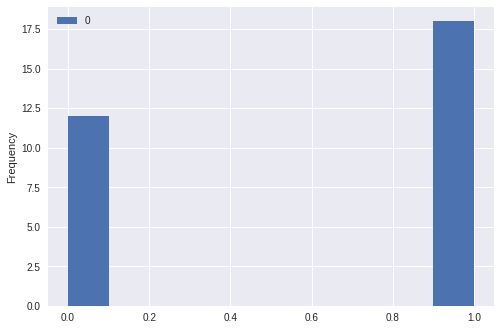

In [7]:
df.plot.hist();

In [8]:
import scipy
help(scipy.stats.ttest_1samp)

Help on function ttest_1samp in module scipy.stats.stats:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate')
    Calculate the T-test for the mean of ONE group of scores.
    
    This is a two-sided test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.
    
    Parameters
    ----------
    a : array_like
        sample observation
    popmean : float or array_like
        expected value in null hypothesis. If array_like, then it must have the
        same shape as `a` excluding the axis dimension
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.

In [9]:
scipy.stats.l

AttributeError: ignored

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

###1. Load and clean the data (or determine the best method to drop observations when running tests)

In [185]:
# TODO - your code here!
import pandas as pd
from scipy import stats

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

cols = ['Class_Name',
       'handicapped-infants',
       'water-project-cost-sharing',
       'adoption-of-the-budget-resolution',
       'physician-fee-freeze',
       'el-salvador-aid',
       'religious-groups-in-schools',
       'anti-satellite-test-ban',
       'aid-to-nicaraguan-contras',
       'mx-missile',
       'immigration',
       'synfuels-corporation-cutback',
       'education-spending',
       'superfund-right-to-sue',
       'crime',
       'duty-free-exports',
       'export-administration-act-south-africa']


df = pd.read_csv(url, names=cols)

df = df.replace({"?": None, "y": 1, "n": 0})
numdf = df.select_dtypes(include=np.number)

for col in numdf:
  dem = df[df["Class_Name"] == "democrat"][col].dropna()
  rep = df[df["Class_Name"] == "republican"][col].dropna()
  res = stats.ttest_ind(dem, rep)
  if res[1] < 0.01:
    print (col)
    if dem.mean() > rep.mean():
      print ("Democrats Support more")
      s = "Statistic - " + str(res[0]) + ", PValue - " + str(res[1])
      print (s)
      print ("---")
    elif rep.mean() > dem.mean():
      print ("Republican Support more")
      s = "Statistic - " + str(res[0]) + ", PValue - " + str(res[1])
      print (s)
      print ("---")
  elif res[1] > 0.1:
    print (col)
    print ("Both classes support the issue")
    s = "Statistic - " + str(res[0]) + ", PValue - " + str(res[1])
    print (s)
    print ("---")

handicapped-infants
Democrats Support more
Statistic - 9.205264294809222, PValue - 1.613440327936998e-18
---
water-project-cost-sharing
Both classes support the issue
Statistic - -0.08896538137868286, PValue - 0.9291556823994811
---
adoption-of-the-budget-resolution
Democrats Support more
Statistic - 23.21277691701378, PValue - 2.0703402795405602e-77
---
physician-fee-freeze
Republican Support more
Statistic - -49.367081573014055, PValue - 1.994262314074572e-177
---
el-salvador-aid
Republican Support more
Statistic - -21.136692611732194, PValue - 5.600520111728605e-68
---
religious-groups-in-schools
Republican Support more
Statistic - -9.737575825219457, PValue - 2.393672252059893e-20
---
anti-satellite-test-ban
Democrats Support more
Statistic - 12.526187929077842, PValue - 8.521033017443427e-31
---
aid-to-nicaraguan-contras
Democrats Support more
Statistic - 18.052093200819733, PValue - 2.824718413723432e-54
---
mx-missile
Democrats Support more
Statistic - 16.43750326854299, PValue 